# Beamline Ray Tracer
By Dan Porter, April 2021
### Explanation of software and simple examples
Simple ray tracing program to trace reflections of beams from various optical elements.

Originally built to trace beamline optics on a synchrotron beamline, with simple components such as mirrors included.

## Installation

In [ ]:
# The following commands will download the project folder from GitHub and cd into that directory
"""
!git clone https://github.com/DanPorter/beamline_ray_tracer.git
import os
os.chdir('./beamline_ray_tracer') # Change directory
!git pull
"""

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import beamline_ray_tracer
from beamline_ray_tracer import components
from beamline_ray_tracer import elements
from beamline_ray_tracer import Diffractometer

## Simple Mirror
To create a calculation you create a "room" or optical table object, then you add beams and optical elements.

### Nomenclature:
* A **beam** is a line vector object. Beam objects contain a list of interaction positions and directions.
* An **element** is a plane in 3D space defined by a normal vector. Elements have a shape and will interact with an incident beam. Examples of elements are:
  * *Window* - beams pass through
  * *Absorber* - stops the beam
  * *Reflector* - reflects the beam from the surface of the plane
* A **Component** is a container of *element* objects, with some relationship between them, such as the elements of a mirror, allowing them to be moved as an entity.
* A **room** is a container of *beam* and *element* objects and contains the main .run() and .plot() functions.

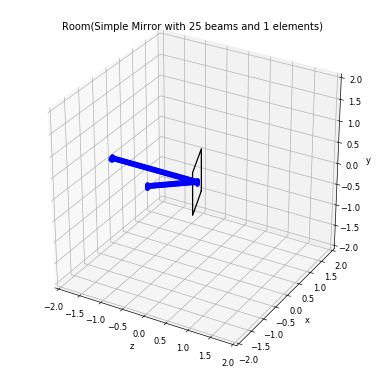

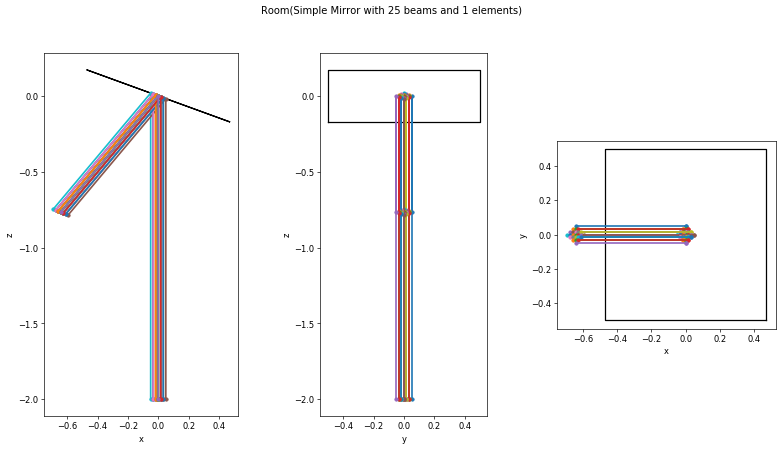

In [2]:
# Create Room
room = beamline_ray_tracer.Room('Simple Mirror')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-2), 
    direction=(0,0,1), 
    horizontal_width=0.1, 
    vertical_width=0.1, 
    n_beams=7
)

# Create a mirror with position, direction and size
mirror_pitch = 20
mirror = components.FlatMirror(
    name='Mirror', 
    position=(0,0,0), 
    normal=(0,0,1), 
    pitch=mirror_pitch, 
    length=1, 
    width=1
)

# Add mirror to room
room.add_component(mirror)

# Run ray tracing simulation
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 



## Curved Mirror
Now the same excersize with a curved cylindrical mirror where we can see the lines cross at the focus of the mirror.


A curved mirror is created by combining several curved optical elements. On each curved element, the beam intersects a plane at the mirror position and the the intersection is traced back to the position on the mirror curve.


A single curved element could be used instead of a combination, however there are instances where the beam will miss the mirror.

Mirror Focus = R/2 = 1.00 m


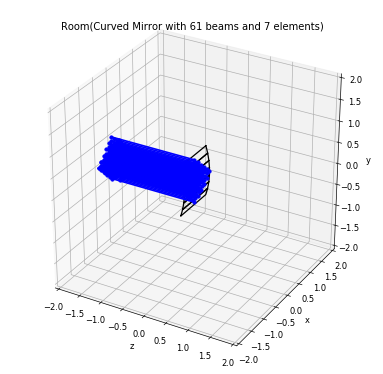

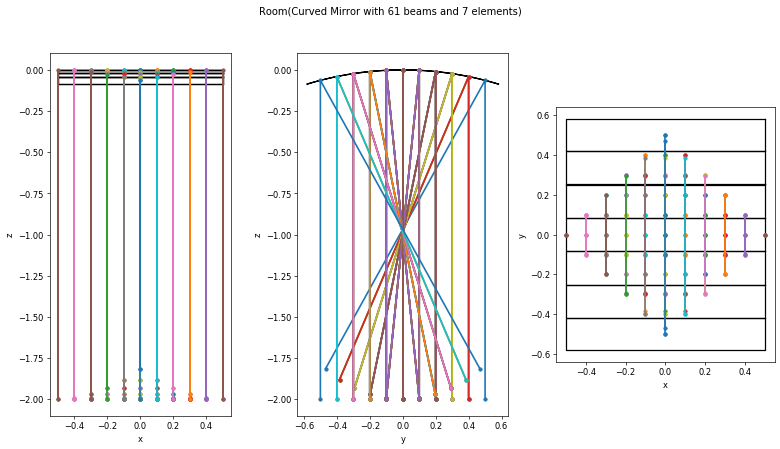

In [3]:
## Curved Mirror

# Create Room
room = beamline_ray_tracer.Room('Curved Mirror')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-2), 
    direction=(0,0,1), 
    horizontal_width=1, 
    vertical_width=1, 
    n_beams=11
)

# Create a mirror with position, direction and size
mirror_radius = 2
mirror_elements = 7
mirror = components.CurvedMirrorVertical(
    name='Mirror', 
    position=(0,0,0), 
    normal=(0,0,-1), 
    radius=mirror_radius, 
    n_elements=mirror_elements,
    length=1, 
    width=1
)

# Calculate focal position 1/Ob + 1/foc = 1/im
focus = mirror_radius/2
print('Mirror Focus = R/2 = %.2f m' % focus)
room.extrude_length(2 * focus)


# Add mirror to room
room.add_component(mirror)

# Run ray tracing simulation
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 



## Two Flat Mirrors
Here we start to combine optical elements. Note that we use *elements* rather than a *component* so that we can position the two mirrors independently. sdgfasdg 

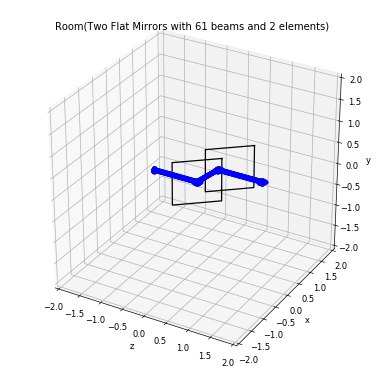

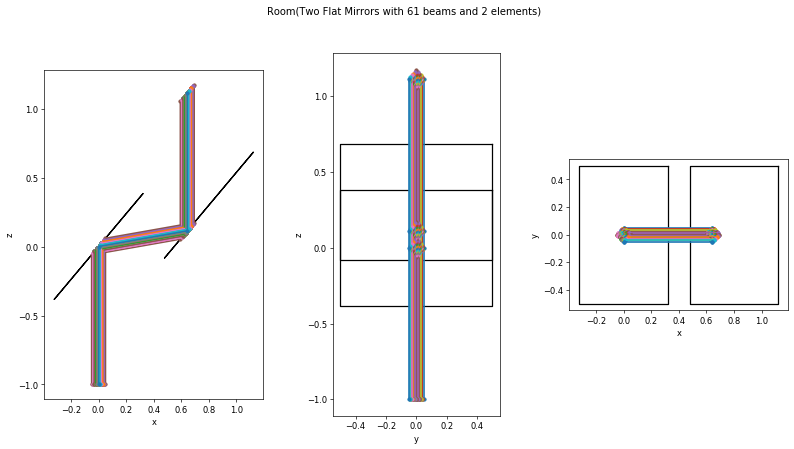

In [4]:
## Two Flat Mirrors

# Create Room
room = beamline_ray_tracer.Room('Two Flat Mirrors')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-1), 
    direction=(0,0,1), 
    horizontal_width=0.1, 
    vertical_width=0.1, 
    n_beams=11
)

# Create two reflector elements - single mirror plates
pitch = 40 # deg
pos1 = np.array([0, 0, 0])
dir1 = np.array([np.cos(np.deg2rad(pitch)), 0, -np.sin(np.deg2rad(pitch))])  # normal to beam at pitch 0
pos2 = pos1 + [0.8, 0, 0.3]
dir2 = dir1
plate1 = elements.Reflector('Mirror1', pos1, dir1, length=1, width=1)
plate2 = elements.Reflector('Mirror2', pos2, dir2, length=1, width=1)



# Add mirror to room
room.add_element_list([plate1, plate2])

# Run ray tracing simulation
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 


## Two Curved Mirrors
The same excersize can be performed with cylindrical mirrors and you can play with the radius.

These mirrors both have their cylindrical axis in the same direction.

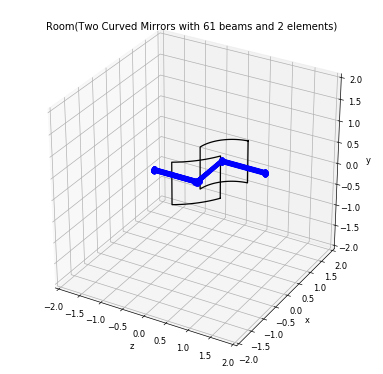

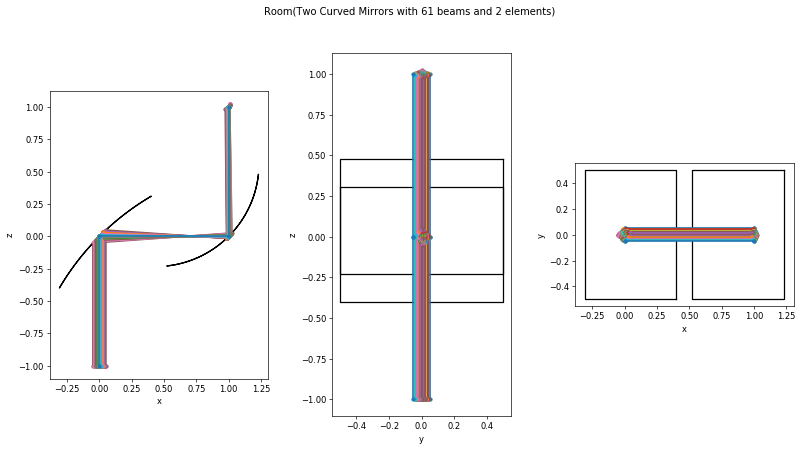

In [5]:
## Two Curved Mirrors

# Create Room
room = beamline_ray_tracer.Room('Two Curved Mirrors')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-1), 
    direction=(0,0,1), 
    horizontal_width=0.1, 
    vertical_width=0.1, 
    n_beams=11
)

# Create two curved reflector elements - single mirror plates that intersect on a curved cylinder
pitch = -45 # deg
pos1 = np.array([0, 0, 0])
dir1 = -np.array([np.cos(np.deg2rad(pitch)), 0, np.sin(np.deg2rad(pitch))])  # normal to beam at pitch 0
pos2 = pos1 + [1, 0, 0]
dir2 = dir1
plate1 = elements.CylindricalReflector('Mirror1', pos1, dir1, length=1, width=1, radius=2)
plate2 = elements.CylindricalReflector('Mirror2', pos2, -dir2, length=1, width=1, radius=0.8)


# Add mirror to room
room.add_element_list([plate1, plate2])

# Run ray tracing simulation
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 


## Two Curved Mirrors
Here we align a cylindrical axis to the mirrors, so one can be horizontally focussing and the second vertically focusing.

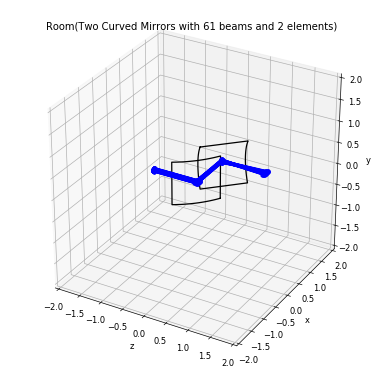

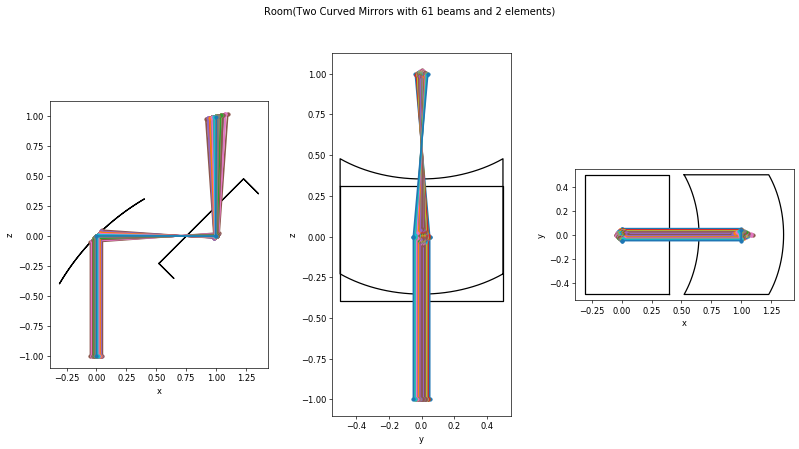

In [6]:
# Create Room
room = beamline_ray_tracer.Room('Two Curved Mirrors')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-1), 
    direction=(0,0,1), 
    horizontal_width=0.1, 
    vertical_width=0.1, 
    n_beams=11
)

# Create two curved reflector elements - single mirror plates that intersect on a curved cylinder
# This time make the two cylinders perpendicular
pitch = -45 # deg
pos1 = np.array([0, 0, 0])
dir1 = -np.array([np.cos(np.deg2rad(pitch)), 0, np.sin(np.deg2rad(pitch))])  # normal to beam at pitch 0
pos2 = pos1 + [1, 0, 0]
dir2 = dir1
plate1 = elements.CylindricalReflector('Mirror1', pos1, dir1, length=1, width=1, horizontal_direction=(1, 0, 0), radius=2)
plate2 = elements.CylindricalReflector('Mirror2', pos2, -dir2, length=1, width=1, horizontal_direction=(0, 1, 0), radius=0.8)


# Add mirror to room
room.add_element_list([plate1, plate2])

# Run ray tracing simulation
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 

## Channel Cut Monochromator
Now let's move onto particular beamline components.

The Channel Cut Monochromator is a *component* with two flat mirrors, seperated by *monogap*. The mirrors rotate by a *bragg* angle to select a particular incident energy, although energy selection isn't simulated just yet! The rotation axis is about the first mirror, so the outgoing beam will be increased in height.

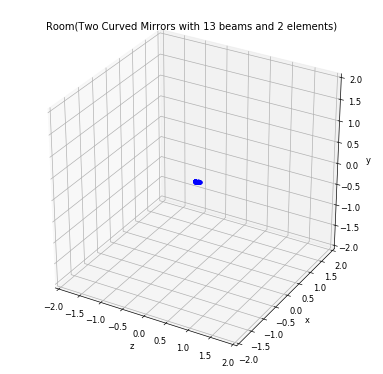

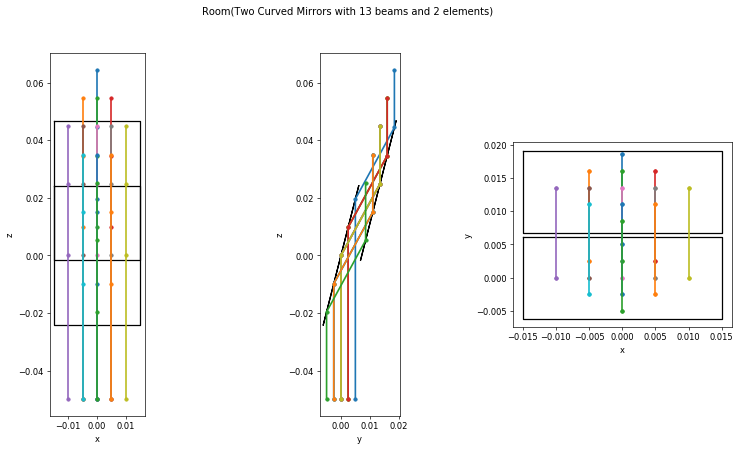

In [7]:
## Channel Cut Mono

# Create Room
room = beamline_ray_tracer.Room('Channel Cut Mono')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-0.05), 
    direction=(0,0,1), 
    horizontal_width=0.02, 
    vertical_width=0.01, 
    n_beams=5
)


def cal_bragg(energy_kev):
    si_latt = 5.431020511  # Silicon
    d_space = si_latt / np.sqrt(3)  # (111)
    # n*lambda = 2d sin theta
    return np.rad2deg(np.arcsin(6.19922 / (energy_kev * d_space)))

# Mono
monogap = 0.007
energy = 8  # keV
bragg = cal_bragg(energy)
mono = components.ChannelCutMono('Si111', [0, 0, 0], bragg=bragg,
                                 monogap=monogap, length=0.05, width=0.03)

# Add mirror to room
room.add_component(mono)

# Run ray tracing simulation
room.extrude_length(0.02)
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections() 

## Cylindrical and bending mirrors
A set of focussing mirrors just like on a beamline. 

The first mirror is a cylindrical mirror with cylindrical axis ~along the beam path. The second mirror is a bending mirror - or in this case a cylindrical mirror with vertical axis. The distances and radii are choosen to be similar to a beamline, producing a fine focus at a long distance.

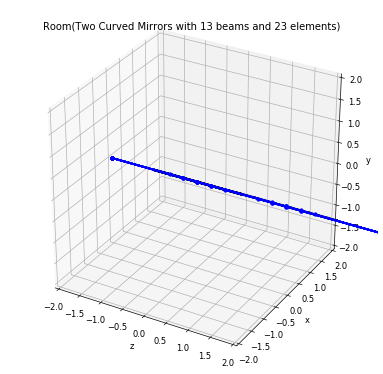

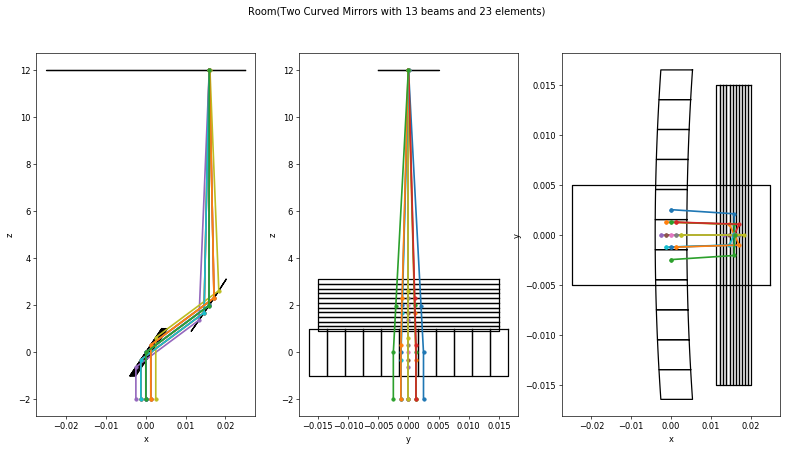

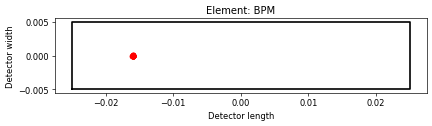

In [8]:
# Create Room
room = beamline_ray_tracer.Room('Inline mirrors')
# Generate set of beams orginating at "position" in direction of "direction"
room.generate_beams(
    position=(0,0,-2), 
    direction=(0,0,1), 
    horizontal_width=0.005, 
    vertical_width=0.005, 
    n_beams=5
)

mirror_sep = 2
mirror_pitch = 0.228
m1_radius = 0.096
m2_radius = 5200


# Mirrors
mirrors = components.MirrorSystem(
    name='MainMirrors', 
    position=[0, 0, 0], 
    pitch=mirror_pitch,
    m1m2distance=mirror_sep, 
    m1_radius=m1_radius, 
    m2_radius=m2_radius,
    n_elements=11, 
    length=2, 
    width=0.03
)

# The mirrors focus a long way from the mirror positon, add a detector
bpm = components.Absorber('BPM', [0, 0, 12], [0, 0, 1], length=0.05, width=0.01)

# Add mirror to room
room.add_component(mirrors)
room.add_element_list([bpm])

# Run ray tracing simulation
room.extrude_length(0.)
room.run()

#print(room)

# Plot the results
room.plot()  # 3D plot

room.plot_projections(False) 

room.plot_detector()

## Diffractometer
The diffractometer component is a combination of a flat mirror, or sample, sitting at the centre and a detector moving around it. The sample and detector can be moved using eulerian angles.

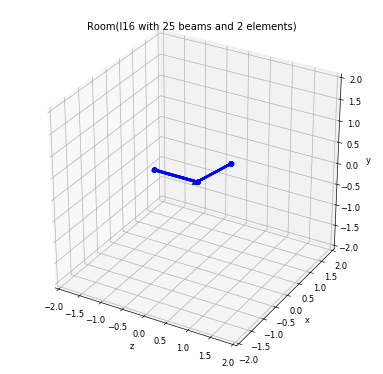

In [13]:
# Instantiate Optical Table (room)
room = beamline_ray_tracer.Room('I16')
room.generate_beams((0, 0, -1), (0, 0, 1), 0.05, 0.02, n_beams=7)

# Create optical components
diffractometer = Diffractometer('I16', [0, 0, 0], eta=20, chi=90, phi=0, mu=0, delta=40, gamma=0, detector_distance=1,
                                sample_length=0.1, sample_width=0.2, detector_normal=(0, 0, 1),
                                detector_pixels=(487, 195), pixel_size=172e-6)
room.add_component(diffractometer)

diffractometer.euler(
    eta=20, 
    chi=90, 
    phi=0, 
    mu=0, 
    delta=40, 
    gamma=0
)

room.run()

# Plot the results
room.plot()  # 3D plot

# Full Beamline Simulation
Finally, we put all these parts together to simulate the full beamline. All the components included here are:

* Channel cut monochromator
* Cylindrical and bending focussing mirrors
* Slits
* Beam position monitor (Window)
* Diffractometer with sample and detector

Energy: 8.000 keV, Bragg = 14.308 Deg
Beam Height: 0.014 m
Mirror pitch: 0.228 Deg (3.98 mrad), bender: 5200 m
 Beam Deflection: 0.016 m
  Vertical focus: 12.062 m
Horizontal focus: 10.346 m
Predicted beam size at sample: X: 0.167 mm, Y:  0.026 mm
Width at Sample:  X: 0.240 mm, Y: 0.102 mm


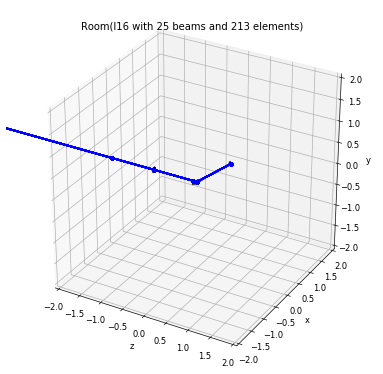

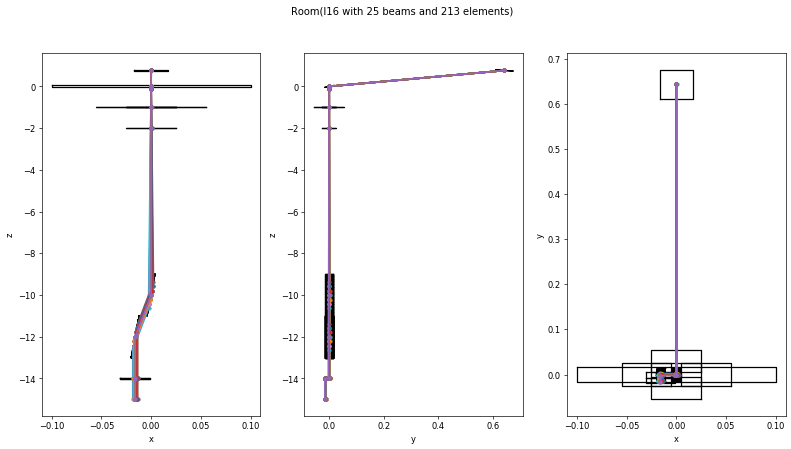

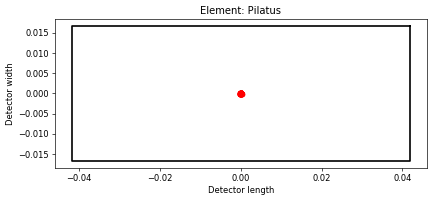

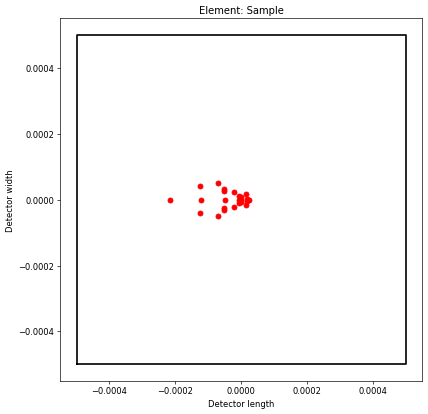

In [21]:
def cal_bragg(energy_kev):
    si_latt = 5.431020511  # Silicon
    d_space = si_latt / np.sqrt(3)  # (111)
    # n*lambda = 2d sin theta
    return np.rad2deg(np.arcsin(6.19922 / (energy_kev * d_space)))


def beamwidth(detector):
    widx, widy = detector.beam_width()
    print('Width at %s:  X: %1.3f mm, Y: %1.3f mm' % (detector.name, widx * 1000, widy * 1000))


def beamsize(pitch, sagittal_radius, meridonal_radius, d_sample, d_mirrors, max_vert, max_horiz):
    """
    Calculate beam size
    """
    sinth = np.sin(np.deg2rad(pitch))
    s_v = np.abs(max_vert * (1 - (2 * d_sample * sinth)/sagittal_radius))
    s_h = np.abs(max_horiz * (1 - 2 * (d_sample - d_mirrors) / (meridonal_radius * sinth)))
    return s_v, s_h


# All distances in m, angles in degrees
energy = 8  # keV
bragg = cal_bragg(energy)
monogap = 0.007
mirror_distance = 12  # distance from mirrors to sample
mirror_sep = 2
mirror_pitch = 0.228
m1_radius = 0.096
m2_radius = 5200

beam_height = 2 * monogap * np.cos(np.deg2rad(bragg))
beam_deflection = mirror_sep * np.tan(2 * np.deg2rad(mirror_pitch))
vertical_focus = m1_radius / (2 * np.sin(np.deg2rad(mirror_pitch)))
horizontal_focus = 0.5 * m2_radius * np.sin(np.deg2rad(mirror_pitch))
beamsize_vert, beamsize_horiz = beamsize(
    pitch=mirror_pitch,
    sagittal_radius=m1_radius,
    meridonal_radius=m2_radius,
    d_sample=mirror_distance,
    d_mirrors=mirror_sep,
    max_vert=0.005,
    max_horiz=0.005
)

print('Energy: %5.3f keV, Bragg = %5.3f Deg' % (energy, bragg))
print('Beam Height: %1.3f m' % beam_height)
print('Mirror pitch: %1.3f Deg (%1.2f mrad), bender: %1.0f m' % (mirror_pitch, 1000*np.deg2rad(mirror_pitch), m2_radius))
print(' Beam Deflection: %1.3f m' % beam_deflection)
print('  Vertical focus: %1.3f m' % vertical_focus)
print('Horizontal focus: %1.3f m' % horizontal_focus)
print('Predicted beam size at sample: X: %1.3f mm, Y: % 1.3f mm' % (beamsize_horiz * 1000, beamsize_vert * 1000))

# Instantiate Optical Table (room)
room = beamline_ray_tracer.Room('I16')
room.generate_beams((-beam_deflection, -beam_height, -mirror_distance-3), (0, 0, 1), 0.005, 0.005, n_beams=7)

" Create optical components "
# Mono
mono = components.ChannelCutMono('Si111', [-beam_deflection, -beam_height, -mirror_distance-2], bragg=bragg,
                                 monogap=monogap, length=0.05, width=0.03)
# Mirrors
mirrors = components.MirrorSystem('MainMirrors', [-beam_deflection, 0, -mirror_distance], mirror_pitch,
                                  m1m2distance=mirror_sep, m1_radius=m1_radius, m2_radius=m2_radius,
                                  n_elements=101, length=2, width=0.03)
# BPM
bpm = components.Window('BPM', [0, 0, -2], [0, 0, 1], length=0.05, width=0.05)
bpm_sample = components.Window('Sample', [0, 0, -0.1], [0, 0, 1], length=0.001, width=0.001)
# Sample slits
slits = components.Slits('Slits', [0, 0, -1], [0, 0, 1], horizontal_gap=0.01, vertical_gap=0.01, plate_width=0.05)
# Diffractometer
diffractometer = Diffractometer('Pilatus', [0, 0, 0], eta=20, chi=90, phi=0, mu=0, delta=40, gamma=0,
                                detector_distance=1, sample_length=0.1, sample_width=0.2, detector_normal=(0, 0, 1),
                                detector_pixels=(487, 195), pixel_size=172e-6)
# Big End of Room Detector (catch beams that don't hit)
catch = components.Detector('catch', [0, 0, 2], [0, 0, 1], size=5)


# Add optical components to room (the order doesn't matter)
room.add_component(mono)
room.add_component(mirrors)
room.add_element_list([bpm, bpm_sample])
room.add_component(slits)
room.add_component(diffractometer)
#room.add_component(catch)

# Run the ray-tracing simulations
room.run()

# print beamsize at sample
beamwidth(bpm_sample)

# Plot the results
room.plot()  # 3D plot
room.plot_projections(False)  # 2D plot
room.plot_detector()  # Plot beam incidence on final component

bpm_sample.plot_detector_image()